In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. 

### Data Loading and Basic Cleaning 

In [3]:
df = pd.read_excel('OnlineRetail.xlsx')

In [5]:
# Check for empty cells using boolean indexing along columns (axis=1)
empty_columns = df.isnull().all(axis=0)
print(empty_columns)

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool


In [7]:
df.describe()   

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Cancelled orders or returned items are seen with a negative quantity, this analysis is reflecting sales so I am removing cancelled orders

In [9]:
df = df[
    (~df['InvoiceNo'].astype(str).str.startswith('C', na=False)) & 
    (df['Quantity'] > 0)
]

In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,531285.000000,531285,531285.000000,397924.000000
mean,10.655262,2011-07-04 18:15:45.816539136,3.857296,15294.315171
min,1.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:01:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:35:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.830323,NaN,41.810047,1713.169877


Splitting invoice date up to hone down on specific insights 

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute

### Exploratory Data Analysis 

Creating total price spent per order

In [15]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

What country is ordering the most
Uk brings in the most sales, which was expected, but Germany, France, EIRE are the top non UK countries.
Noticing that after EIRE there is a large jump in numbers from ~ 8000-9000 to Spain next in line with 2485

In [17]:
df['Country'].value_counts() 

Country
United Kingdom          486286
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


#### Monthly look of sales over time

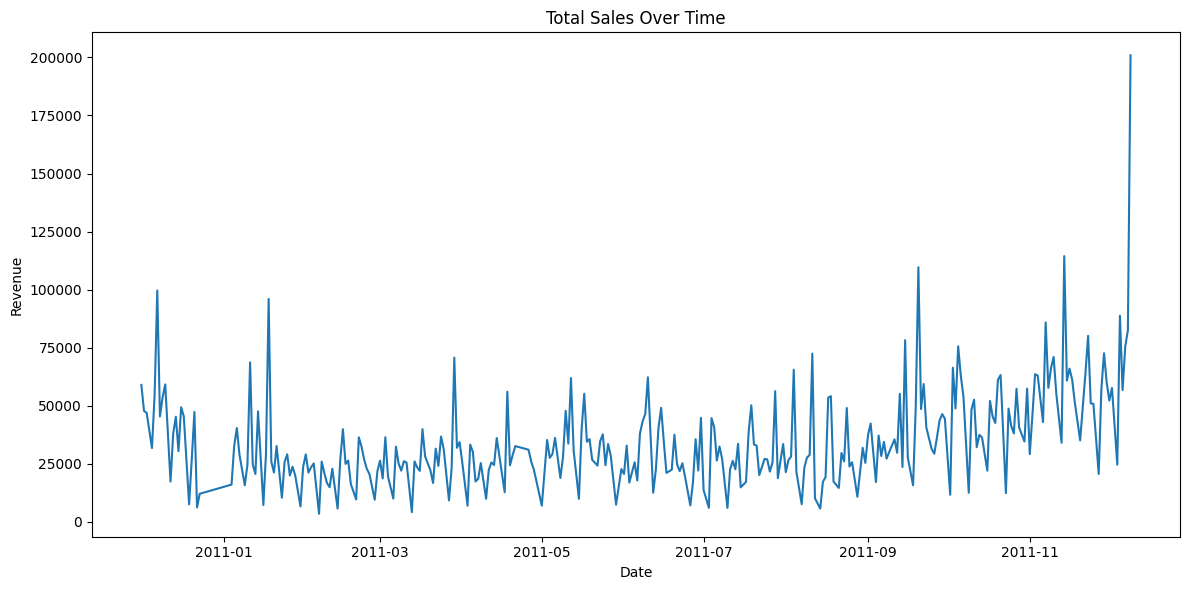

In [35]:
# Strip time, keep only the date (not full timestamp)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

# Group by date and sum revenue
sales_over_time = df.groupby('InvoiceDate')['TotalPrice'].sum().sort_index()

# Plot as a line chart
sales_over_time.plot(kind='line', figsize=(12,6), title='Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


February, June and November/December bring in the most sales, with december being the highest becuase of Christmas. 

#### Top products by Revenue 

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: TotalPrice, dtype: float64


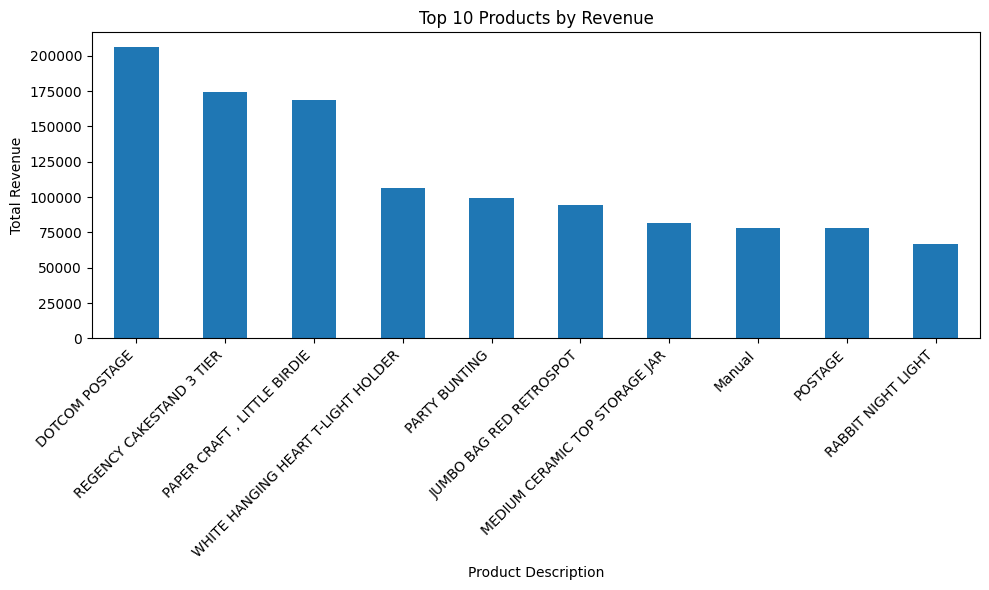

In [30]:
# Group by product description and sum the total revenue
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Display the top 10 selling products
print(top_products)

top_products.plot(kind='bar', figsize=(10,6), title='Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48478
WHITE HANGING HEART T-LIGHT HOLDER    37895
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


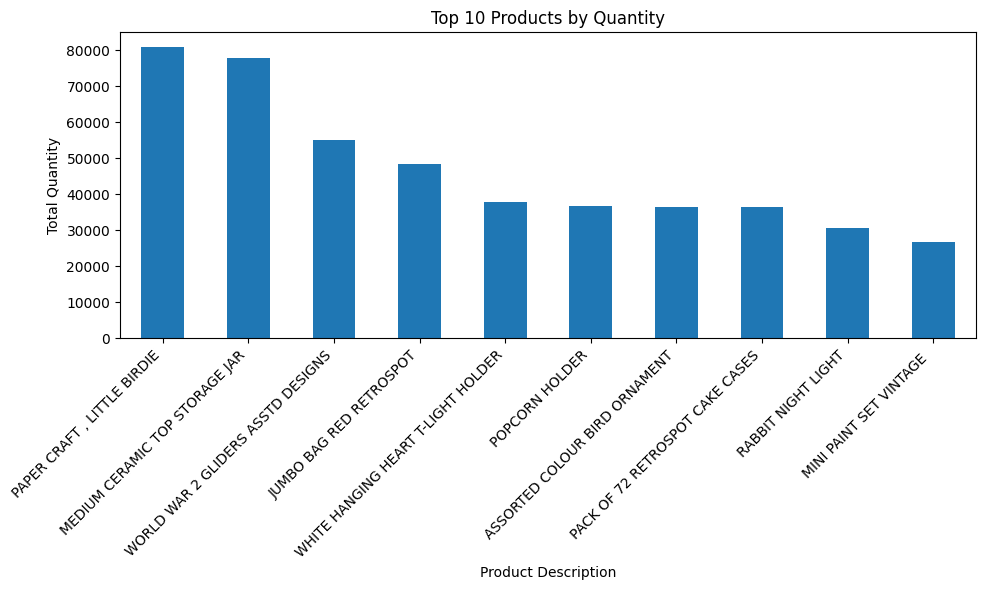

In [32]:
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Display the top 10 selling products
print(top_products_quantity)

top_products_quantity.plot(kind='bar', figsize=(10,6), title='Top 10 Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observation:
"Dotcom Postage" generated the highest total revenue but does not appear among the top 10 products by quantity sold.

Implication:
This suggests that "Dotcom Postage" is a high-priced item or service, rather than a frequently purchased one.

Next Steps / Business Question:

What is the unit price of Dotcom Postage?

Who are the customers purchasing it, and where are they located?

Should marketing efforts focus on promoting more of this high-margin product?

In [41]:
# Average price of items in this retail store 
dotcom_price = df['UnitPrice'].mean()
print(f"Average unit price of items sold: £{dotcom_price:.2f}")

# Average Unit Price of Dotcom Postage
dotcom_price = df[df['Description'] == 'DOTCOM POSTAGE']['UnitPrice'].mean()
print(f"Average unit price of Dotcom Postage: £{dotcom_price:.2f}")

# Top countries purchasing Dotcom Postage
buyers = df[df['Description'] == 'DOTCOM POSTAGE'].groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top countries buying Dotcom Postage:")
print(buyers)


Average unit price of items sold: £3.86
Average unit price of Dotcom Postage: £291.31
Top countries buying Dotcom Postage:
Country
United Kingdom    708
Name: Quantity, dtype: int64


##### What country is the top customers coming from? 

In [27]:
# Step 1: Count unique invoices per customer
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_orders.rename(columns={'InvoiceNo': 'NumOrders'}, inplace=True)

# Step 2: Merge with total revenue and country (from earlier)
top_customers_full = top_customers.merge(customer_orders, on='CustomerID')

# Step 3: Sort by revenue and show top 10
top_customers_full_sorted = top_customers_full.sort_values(by='TotalPrice', ascending=False).head(10)
print(top_customers_full_sorted)

      CustomerID  TotalPrice         Country  NumOrders
1690     14646.0   280206.02     Netherlands         74
4202     18102.0   259657.30  United Kingdom         60
3729     17450.0   194550.79  United Kingdom         46
3009     16446.0   168472.50  United Kingdom          2
1880     14911.0   143825.06            EIRE        201
55       12415.0   124914.53       Australia         21
1334     14156.0   117379.63            EIRE         55
3772     17511.0    91062.38  United Kingdom         31
2703     16029.0    81024.84  United Kingdom         63
0        12346.0    77183.60  United Kingdom          1


Netherlands has a customer who brought in the most revenue, but that also is accounting for almost all of netherlands sales in total. 

In [52]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(country_revenue.head(10))

print("Revenue without UK:")
non_uk_revenue = df[df['Country'] != 'United Kingdom']
non_uk_revenue.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    9003097.964
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64
Revenue without UK:


Country
Netherlands    285446.34
EIRE           283453.96
Germany        228867.14
France         209715.11
Australia      138521.31
Spain           61577.11
Switzerland     57089.90
Belgium         41196.34
Sweden          38378.33
Japan           37416.37
Name: TotalPrice, dtype: float64

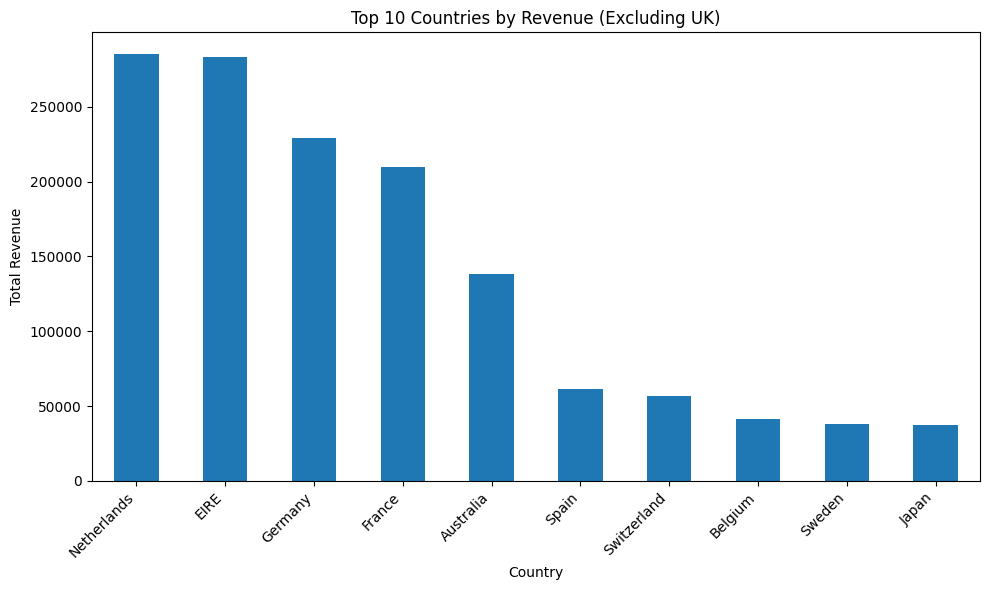

In [31]:
# Step 1: Filter out UK
non_uk = df[df['Country'] != 'United Kingdom']

# Step 2: Group by Country and sum TotalPrice
revenue_by_country = non_uk.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(10,6))
revenue_by_country.plot(kind='bar')
plt.title('Top 10 Countries by Revenue (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Feature engineering

I am going to create a model which can tell us whether a customer will most likely be returning or not through classification, so either logistic regression or random forest.

RFM variables (Recency, Frequency, Monetary) are classic customer behavior indicators. We compute these values per customer

RFM: will summarize how recently(engagement, lower = more recent), how often(loyalty), and how much customers spend (profitability), which allows me to predict repeat business further down my analysis 


In [37]:
import datetime as dt

# Use the last date in dataset + 1 day as the "current" snapshot
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [39]:
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40
5,12352.0,37,8,2506.04
6,12353.0,205,1,89.00
7,12354.0,233,1,1079.40
8,12355.0,215,1,459.40
9,12356.0,23,3,2811.43


In [41]:
# Count how many unique orders each customer made
orders = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
orders.columns = ['CustomerID', 'NumOrders']

# Create binary target
orders['ReturningCustomer'] = orders['NumOrders'] > 1


In [43]:
rfm_model = rfm.merge(orders[['CustomerID', 'ReturningCustomer']], on='CustomerID')
rfm_model.head(10)

,CustomerID,Recency,Frequency,Monetary,ReturningCustomer
0,12346.0,326,1,77183.60,False
1,12347.0,3,7,4310.00,True
2,12348.0,76,4,1797.24,True
3,12349.0,19,1,1757.55,False
4,12350.0,311,1,334.40,False
5,12352.0,37,8,2506.04,True
6,12353.0,205,1,89.00,False
7,12354.0,233,1,1079.40,False
8,12355.0,215,1,459.40,False
9,12356.0,23,3,2811.43,True


In [45]:
rfm_model['AvgOrderValue'] = rfm_model['Monetary'] / rfm_model['Frequency']
rfm_model['AvgOrderValue'] = rfm_model['AvgOrderValue'].round(2)


Add country so we can consider country in prediction as well

In [47]:
# Get the most frequent country per customer
cust_country = df.groupby('CustomerID')['Country'].agg(lambda x: x.value_counts().index[0])
rfm_model = rfm_model.merge(cust_country, on='CustomerID')

# One-hot encode if using a model that needs numeric input
rfm_model = pd.get_dummies(rfm_model, columns=['Country'], drop_first=True)
rfm_model.head(10)

,CustomerID,Recency,Frequency,Monetary,ReturningCustomer,AvgOrderValue,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,326,1,77183.60,False,77183.60,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,12347.0,3,7,4310.00,True,615.71,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12348.0,76,4,1797.24,True,449.31,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12349.0,19,1,1757.55,False,1757.55,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12350.0,311,1,334.40,False,334.40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,12352.0,37,8,2506.04,True,313.26,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,12353.0,205,1,89.00,False,89.00,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,12354.0,233,1,1079.40,False,1079.40,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,12355.0,215,1,459.40,False,459.40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,12356.0,23,3,2811.43,True,937.14,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The data set I will using to model has 4339 rows and 78 columns

What countries are bringing in the most frequent buyers? 

In [51]:
#Isolate country columns 
country_col = [col for col in rfm_model.columns if col.startswith('Country')]

In [61]:
#Melt to long form 
country_df = rfm_model[['CustomerID', 'Frequency'] + country_col].melt(
    id_vars = ['CustomerID', 'Frequency'], 
    value_vars = country_col,
    var_name = 'Country',
    value_name = 'IsCountry'
)


country_df = country_df[country_df['IsCountry'] == True]

country_df.head(10)

,CustomerID,Frequency,Country,IsCountry
11,12358.0,2,Country_Austria,True
13,12360.0,3,Country_Austria,True
23,12373.0,1,Country_Austria,True
24,12374.0,1,Country_Austria,True
54,12414.0,3,Country_Austria,True
88,12453.0,1,Country_Austria,True
370,12817.0,1,Country_Austria,True
371,12818.0,1,Country_Austria,True
407,12865.0,2,Country_Austria,True
4345,12353.0,1,Country_Bahrain,True


In [63]:
#Remove 'Country' from each 
country_df['Country'] = country_df['Country'].str.replace('Country_', '')

<function matplotlib.pyplot.show(close=None, block=None)>

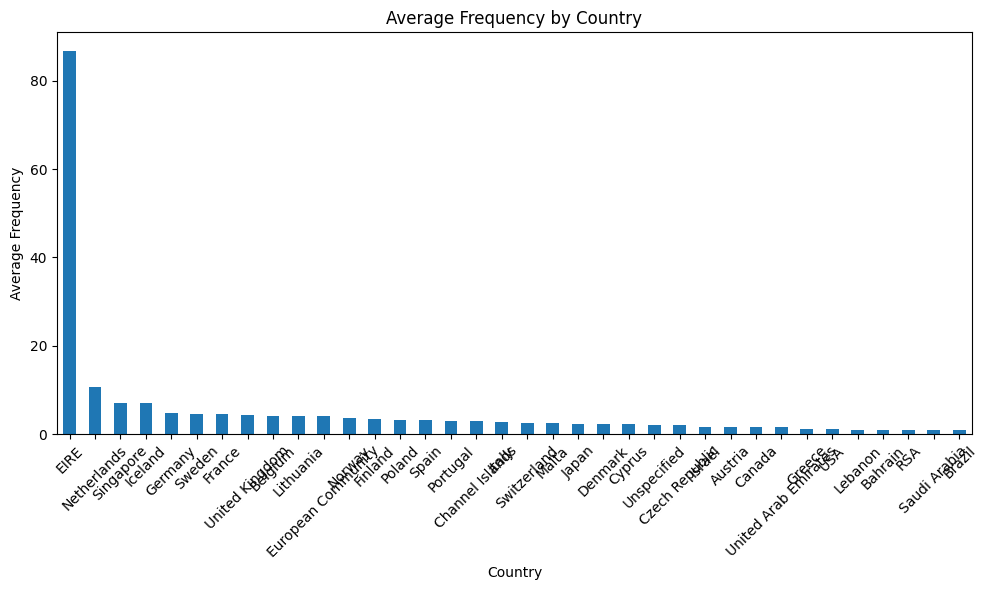

In [65]:
avg_freq_by_country = country_df.groupby('Country')['Frequency'].mean().sort_values(ascending = False)

avg_freq_by_country.plot(kind = 'bar', figsize = (10,6), title = 'Average Frequency by Country')
plt.ylabel('Average Frequency')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show

In [67]:
avg_freq_by_country.head(10)

Country
EIRE              86.666667
Netherlands       10.555556
Singapore          7.000000
Iceland            7.000000
Germany            4.861702
Sweden             4.500000
France             4.471264
United Kingdom     4.246111
Belgium            4.083333
Lithuania          4.000000
Name: Frequency, dtype: float64

EIRE has an extremly large average frequency, this may be because there is a company that consistently buys in bulk from EIRE

In [69]:
country_df[country_df['Country'] == 'EIRE']

,CustomerID,Frequency,Country,IsCountry
40282,14016.0,4,EIRE,True
40385,14156.0,55,EIRE,True
40931,14911.0,201,EIRE,True


In [71]:
df[df['Country'] == 'EIRE']['CustomerID'].dropna().unique()

array([14911., 14156., 14016.])

In [73]:
## how much is 14911 bringing in? 
rfm[rfm['CustomerID'] == 14911]

,CustomerID,Recency,Frequency,Monetary
1880,14911.0,2,201,143825.06


Confirming that EIRE orders is coming from 3 distinct customers... EIRE has a consistent customer

Lets see what the average monetary is per country to see how this one customer compares to the general spread beacuse from the first
plot (country vs revenue) Eire was number 2 with 283453.9 in revenue. This customer brings in half of that money alone from Eire.  

Re doing the plot wihtout this customer to truly see trends

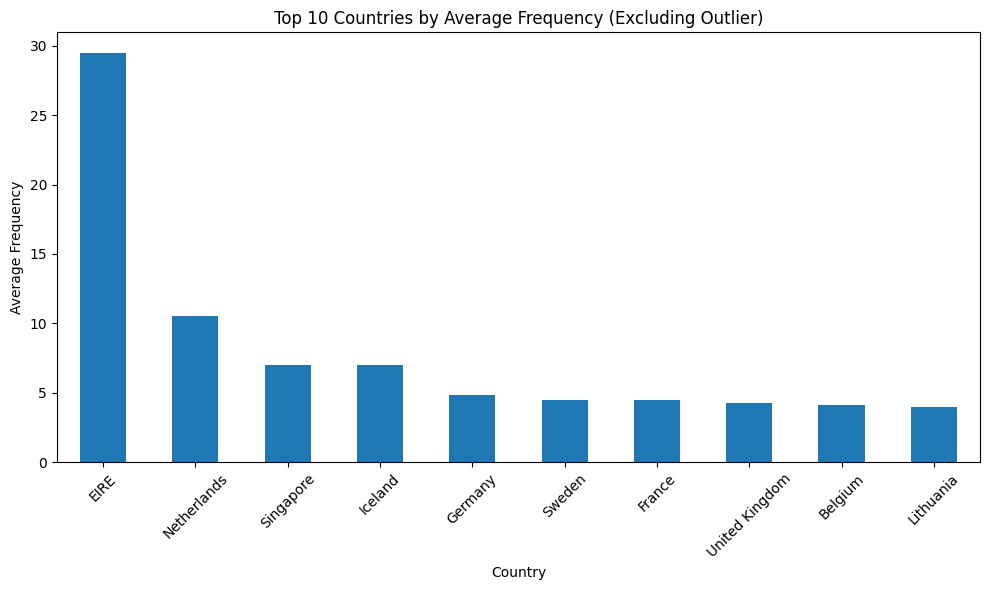

In [75]:
# Exclude the outlier
no_outlier = country_df[country_df['CustomerID'] != 14911]

# Group and sort average frequency by country
avg_freq_by_country_no = no_outlier.groupby('Country')['Frequency'].mean().sort_values(ascending=False)

# Keep only the top 10 countries
top_10_countries = avg_freq_by_country_no.head(10)

# Plot
top_10_countries.plot(kind='bar', figsize=(10,6), title='Top 10 Countries by Average Frequency (Excluding Outlier)')
plt.ylabel('Average Frequency')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most frequent customers are still from EIRE

In [77]:
##Turning True/false into numeric dummy variables

rfm_model_encoded = rfm_model.copy()
rfm_model_encoded = rfm_model_encoded.replace({True: 1, False: 0})

rfm_model_encoded.head(10)

/var/folders/qr/4zhw3zlx3f96zp33mnfgvtwm0000gn/T/ipykernel_85312/276216733.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rfm_model_encoded = rfm_model_encoded.replace({True: 1, False: 0})


,CustomerID,Recency,Frequency,Monetary,ReturningCustomer,AvgOrderValue,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,326,1,77183.60,0,77183.60,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347.0,3,7,4310.00,1,615.71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348.0,76,4,1797.24,1,449.31,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349.0,19,1,1757.55,0,1757.55,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350.0,311,1,334.40,0,334.40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12352.0,37,8,2506.04,1,313.26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,12353.0,205,1,89.00,0,89.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12354.0,233,1,1079.40,0,1079.40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,12355.0,215,1,459.40,0,459.40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12356.0,23,3,2811.43,1,937.14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modelling

In [ ]:
##We dont need customerID and Returning customer will be our response
## I used frequency to see if the customer returned or not, but the model will automatically assume the customer returned if frequency >1
X = rfm_model_encoded.drop(['CustomerID', 'ReturningCustomer', 'Frequency'], axis=1)
y = rfm_model_encoded['ReturningCustomer']


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [83]:
y_pred = clf.predict(X_test)

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.99      1.00      0.99       866

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302



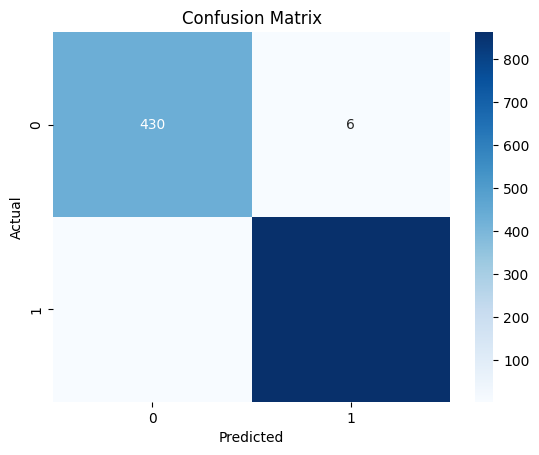

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [89]:
# Step 1: Copy the original features from X_test
results = X_test.copy()

# Step 2: Add actual and predicted labels
results['Actual'] = y_test.values
results['Predicted'] = clf.predict(X_test)
results['Probability'] = clf.predict_proba(X_test)[:, 1].round(2)  # Class 1 confidence

# Step 3: Display the first few rows
results.head(20)


,Recency,Monetary,AvgOrderValue,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Actual,Predicted,Probability
3976,54,131.94,131.94,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.02
1448,65,508.58,508.58,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.01
2663,18,1054.73,527.36,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0.96
17,8,1313.10,328.28,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1.00
1634,96,3099.12,774.78,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0.98
881,59,3624.35,604.06,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0.88
134,354,383.70,383.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.11
2338,255,229.33,229.33,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.01
1992,373,106.20,106.20,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.01
3134,246,129.45,129.45,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.00


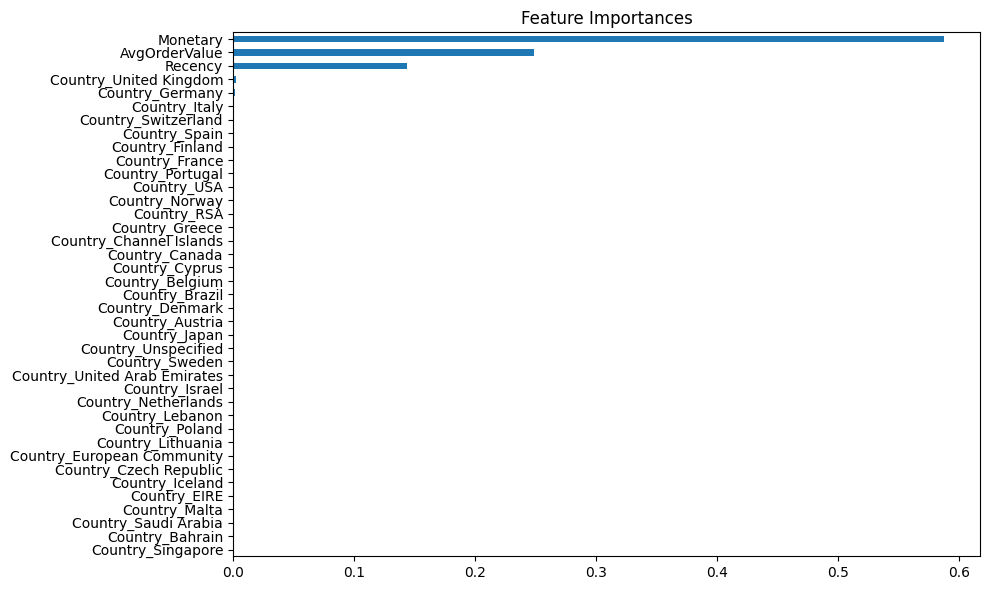

In [91]:


feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importances')
plt.tight_layout()
plt.show()


Clearly, it is easy for the model to predict whether a customer will return or not based on monetary and average order ,value the most, as it is intuitive that as one of these variables were to increase, so would the likelihood that it comes from multiple purchases, so the model was expected to do well. But I want to see if I can create this model given first-time customer, based on the original features plus monetary, etc, will this customer return? This will be more difficult to predict, but we can still uncover some valuable insights. 

The initial model performed at 99% accuracy, but suffered from data leakage. I addressed this by limiting the dataset to only the first order per customer.


In [93]:
# First, sort by InvoiceDate
df_sorted = df.sort_values(by='InvoiceDate')

# Get each customer's first order row
first_orders = df_sorted.groupby('CustomerID').first().reset_index()

first_orders.head(10)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Day,Hour,Minute,TotalPrice
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,United Kingdom,1,18,10,1,77183.60
1,12347.0,537626,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-07,3.75,Iceland,12,7,14,57,15.00
2,12348.0,539318,POST,POSTAGE,6,2010-12-16,40.00,Finland,12,16,19,9,240.00
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21,7.50,Italy,11,21,9,51,15.00
4,12350.0,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02,2.10,Norway,2,2,16,1,25.20
5,12352.0,544156,21756,BATH BUILDING BLOCK WORD,3,2011-02-16,5.95,Norway,2,16,12,33,17.85
6,12353.0,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19,2.95,Bahrain,5,19,17,47,17.70
7,12354.0,550911,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-04-21,0.85,Spain,4,21,13,11,8.50
8,12355.0,552449,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-05-09,2.95,Bahrain,5,9,13,49,17.70
9,12356.0,541430,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,32,2011-01-18,0.65,Portugal,1,18,9,50,20.80


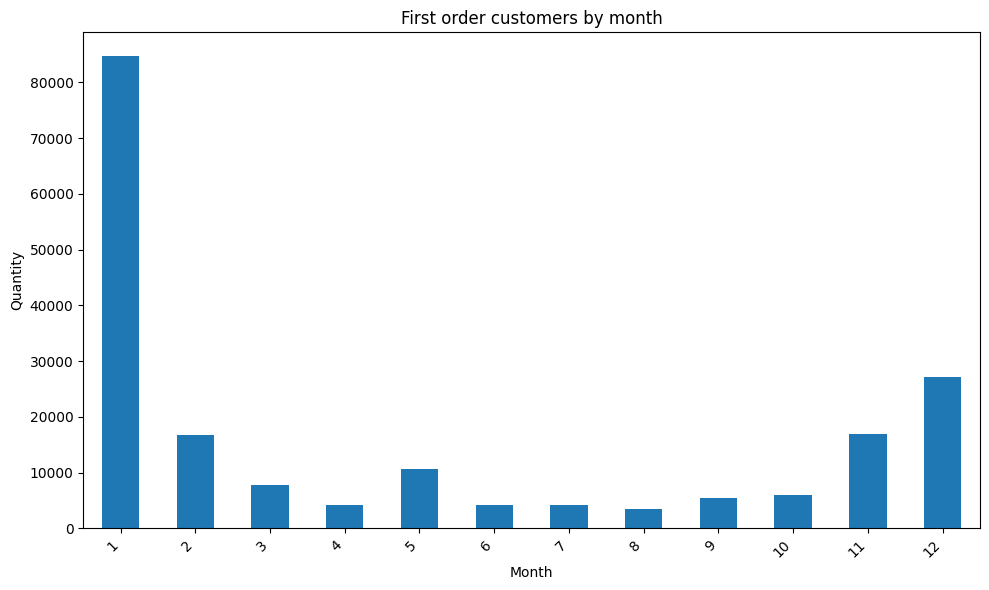

In [95]:
revenue_by_country = first_orders.groupby('Month')['Quantity'].sum().head(12)

# Step 3: Plot
plt.figure(figsize=(10,6))
revenue_by_country.plot(kind='bar')
plt.title('First order customers by month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

January brings in the most first time customers compared to other monthes

In [101]:
#Adding returning customer
first_orders = first_orders.merge(rfm_model[['CustomerID', 'ReturningCustomer']], on='CustomerID')

first_orders.head(10)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Month,Day,Hour,Minute,TotalPrice,ReturningCustomer
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,United Kingdom,1,18,10,1,77183.60,False
1,12347.0,537626,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-07,3.75,Iceland,12,7,14,57,15.00,True
2,12348.0,539318,POST,POSTAGE,6,2010-12-16,40.00,Finland,12,16,19,9,240.00,True
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21,7.50,Italy,11,21,9,51,15.00,False
4,12350.0,543037,22412,METAL SIGN NEIGHBOURHOOD WITCH,12,2011-02-02,2.10,Norway,2,2,16,1,25.20,False
5,12352.0,544156,21756,BATH BUILDING BLOCK WORD,3,2011-02-16,5.95,Norway,2,16,12,33,17.85,True
6,12353.0,553900,37450,CERAMIC CAKE BOWL + HANGING CAKES,6,2011-05-19,2.95,Bahrain,5,19,17,47,17.70,False
7,12354.0,550911,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-04-21,0.85,Spain,4,21,13,11,8.50,False
8,12355.0,552449,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-05-09,2.95,Bahrain,5,9,13,49,17.70,False
9,12356.0,541430,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,32,2011-01-18,0.65,Portugal,1,18,9,50,20.80,True


In [103]:
# drop missing CustomerIDs
first_orders = first_orders.dropna(subset=['CustomerID'])

# One-hot encode Country
first_orders_encoded = pd.get_dummies(first_orders, columns=['Country'], drop_first=True)

# Define X and y
X = first_orders_encoded.drop(['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Day', 'Minute','ReturningCustomer'], axis=1)
y = first_orders_encoded['ReturningCustomer']


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.50      0.38      0.43       436
        True       0.72      0.80      0.76       866

    accuracy                           0.66      1302
   macro avg       0.61      0.59      0.60      1302
weighted avg       0.65      0.66      0.65      1302



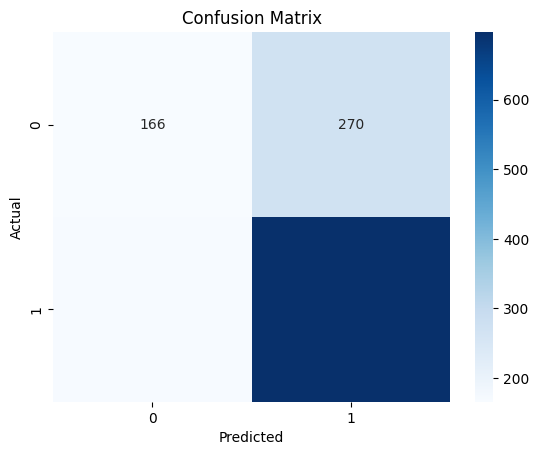

In [107]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# View best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [112]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.66      0.35      0.45       436
        True       0.73      0.91      0.81       866

    accuracy                           0.72      1302
   macro avg       0.70      0.63      0.63      1302
weighted avg       0.71      0.72      0.69      1302



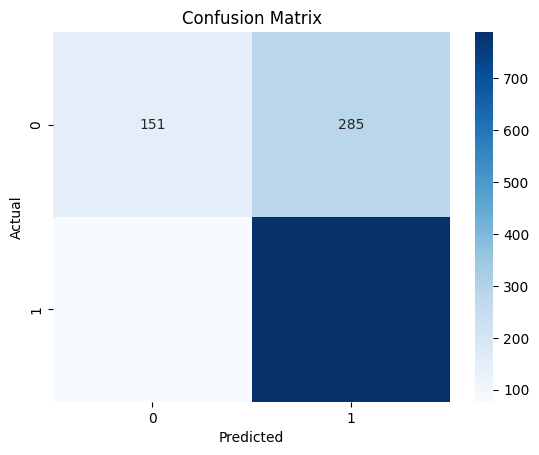

In [114]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

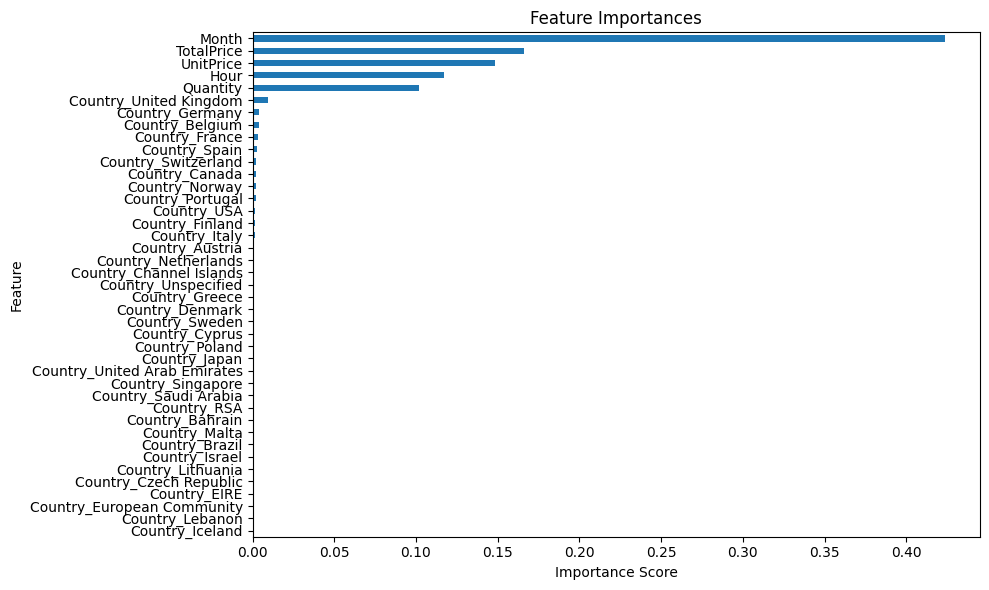

In [116]:

model = best_rf  

# Create a Series of feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

What is the first model vs the fine tuned model showing us? 
1. the overall accuracy of the model increased and there was an increase in recall as well
2. it is misclassifying more non-returners... a lower recall for class 0

we don't want too many false positives. 

In [132]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_probs > 0.62).astype(int)  # Trying a different threshold to reduce false positives


print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[235 201]
 [214 652]]
              precision    recall  f1-score   support

       False       0.52      0.54      0.53       436
        True       0.76      0.75      0.76       866

    accuracy                           0.68      1302
   macro avg       0.64      0.65      0.64      1302
weighted avg       0.68      0.68      0.68      1302



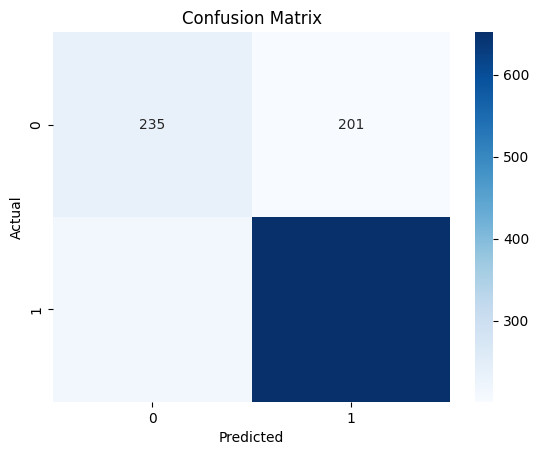

In [134]:
cm = confusion_matrix(y_test, y_pred_thresh)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.4, 0.5, 0.6, 0.62, 0.65, 0.7]
metrics = []

for t in thresholds:
    y_pred_thresh = (y_probs > t).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics.append((t, precision, recall, f1))


metrics_df = pd.DataFrame(metrics, columns=['Threshold', 'Precision', 'Recall', 'F1'])
print(metrics_df)


   Threshold  Precision    Recall        F1
0       0.40   0.688111  0.975751  0.807068
1       0.50   0.734637  0.911085  0.813402
2       0.60   0.754386  0.794457  0.773903
3       0.62   0.764361  0.752887  0.758581
4       0.65   0.772549  0.682448  0.724709
5       0.70   0.787086  0.520785  0.626824


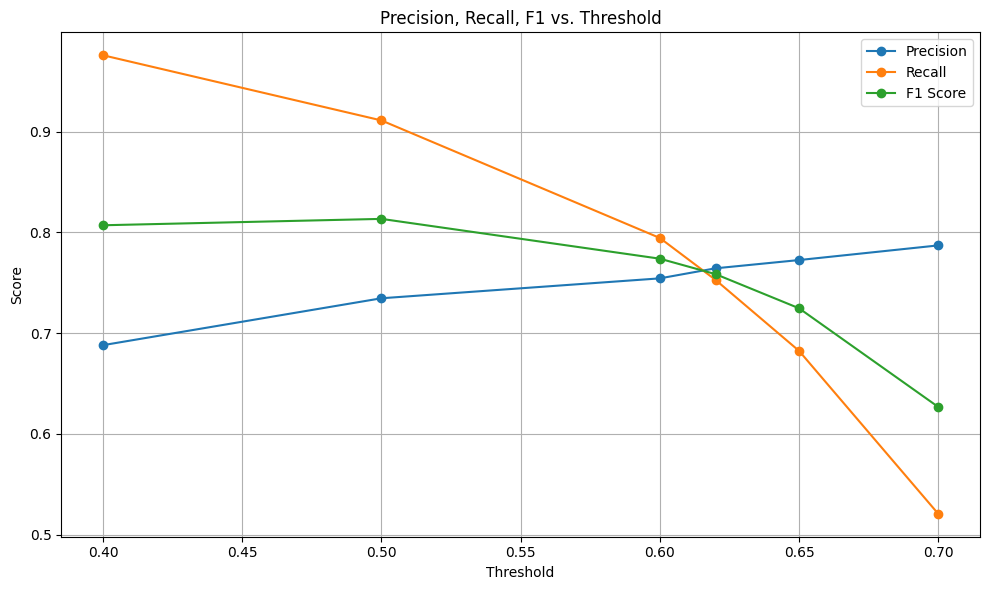

In [138]:
plt.figure(figsize=(10,6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall', marker='o')
plt.plot(metrics_df['Threshold'], metrics_df['F1'], label='F1 Score', marker='o')

plt.title('Precision, Recall, F1 vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using the original model threshold 0.5 with the best parameters, this model is capable of predicting return behavior for new customers with strong balance between precision and recall. But there is a chunk of false positives, which may waste time and energy on advertising or marketing to those customers.  In future applications, threshold tuning could be applied depending on whether business priorities favor retention targeting or cost-efficiency.

### Model Summary

This model predicts whether a first-time buyer will make a repeat purchase, using features derived from customer transaction behavior.

After testing various classification thresholds, we found that:

A threshold of 0.50 provided the best balance between precision (73.5%) and recall (91.1%), resulting in a strong F1-score of 0.813.

Lower thresholds (e.g., 0.40) increased recall but at the cost of precision—predicting more returners than actually existed.

Higher thresholds (e.g., 0.65–0.70) improved precision but significantly reduced recall, meaning the model missed many actual returners.

Interpretation:
Since the model is not currently deployed in a cost-sensitive environment, we optimize for overall performance rather than minimizing one type of error.
In future business applications (e.g., targeted marketing), the classification threshold could be adjusted to reduce false positives or maximize true positives, depending on the goal.


This project successfully developed a model to predict customer repurchase behavior based on RFM features. The model demonstrated strong F1 performance and provides a foundation for future work in retention targeting and customer segmentation.